- Data Structure, p.90
- Travel concepts, p.372

In [12]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# https://stackoverflow.com/questions/34478398/import-local-function-
# from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import local_module as local

In [1]:
url_2001 = "https://nhts.ornl.gov/2001/download/Ascii.zip"
url_2009 = "https://nhts.ornl.gov/2009/download/Ascii.zip"
url_2017 = "https://nhts.ornl.gov/assets/2016/download/csv.zip"

# 2001

In [31]:
DAY_cols = [
    "TRPTRANS", # transportation mode on travel day trip
    "WTTRDFIN" # travel day trip weight for persons in households where at least 50 percent of household members 18 and over completed a person interview
]

HH_cols = [
    "HHNUMBIK", # number of full size bicycles in household
    "HHSTFIPS" # FIPS state code for household
]

PER_cols = [
    "NBIKETRP", # number of bike trips in the last week
    "NWALKTRP", # number of walk trips in the last week
    "DTNOWALK", # lack of walkways or sidewalks
    "WRKTRANS" # transportation mode to work last week
]

In [35]:
# get the relevant csv file
nhts_01 = local.fetch_multi_csv_zip_from_url(
    url_2001, 
    filenames=["DAYPUB.csv"],
    low_memory=False # deal with multiple dtypes in one column
)

In [47]:
# dictionary for the TRPTRANS column
# User Manual B-136 / PDF p.267
TRPTRANS_dict = {
    -1: "Appropriate Skip",
    -7: "Refused",
    -8: "Don't Know",
    -9: "Not Ascertained",
    1: "Car",
    2: "Van",
    3: "SUV",
    4: "Pickup truck",
    5: "Other truck",
    6: "RV",
    7: "Motorcycle",
    8: "Commercial/charter airplane",
    9: "Private/corporate airplane",
    10: "Local public transit bus",
    11: "Commuter bus",
    12: "School bus",
    13: "Charter/tour bus",
    14: "City to city bus",
    15: "Amtrack/inter city train",
    16: "Commuter train",
    17: "Subway/elevated rail",
    18: "Street car/trolley",
    19: "Ship/cruise",
    20: "Passenger line/ferry",
    21: "Sailboat/motorboat/Yacht",
    22: "Taxicab",
    23: "Limousine",
    24: "Hotel/airport shuttle",
    25: "Bicycle",
    26: "Walk",
    91: "Other"
}

# replace values
nhts_01["TRPTRANS"].replace(TRPTRANS_dict, inplace=True)

In [63]:
# group total valid trips by mode according to directions in Travel Concepts 
mode = nhts_01.groupby("TRPTRANS")["WTTRDFIN"].sum().reset_index().sort_values("WTTRDFIN", ascending=False)
mode["P_TRIPS"] = mode["WTTRDFIN"] / mode["WTTRDFIN"].sum()

<AxesSubplot:xlabel='P_TRIPS', ylabel='TRPTRANS'>

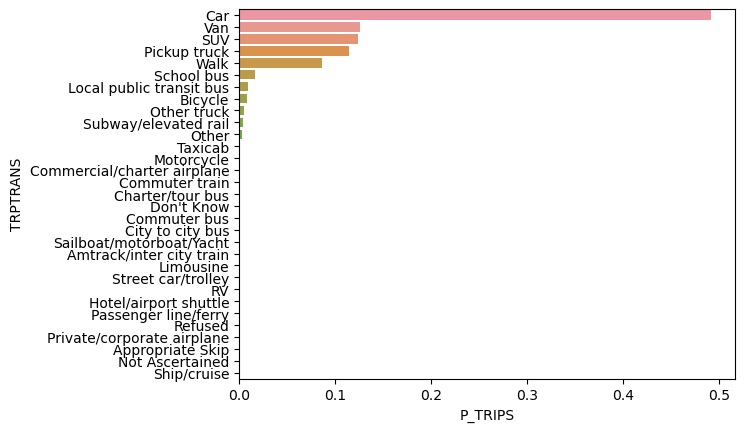

In [64]:
# https://seaborn.pydata.org/examples/part_whole_bars.html
sns.barplot(
    x="P_TRIPS",
    y="TRPTRANS", # "WTTRDFIN"
    data=mode
)

# 2009

In [68]:
# get the relevant csv file
nhts_09 = local.fetch_multi_csv_zip_from_url(
    url_2009, 
    filenames=["Ascii/DAYV2PUB.CSV"],
    low_memory=False # deal with multiple dtypes in one column
)